# Gaussian Elimination: ShowGe + nM.ge

This notebook demonstrates the Julia ShowGe interface and the Python-style nM.ge wrapper.

In [1]:
using GenLAProblems
using Random
Random.seed!(41283);

TaskLocalRNG()

## ShowGe workflow

In [2]:
A, X, B = gen_gj_pb(3, 6, 2; maxint=2, pivot_in_first_col=false, num_rhs=2, has_zeros=false)
pb = ShowGe{Rational{Int}}(A, B, tmp_dir="../../tmp")
ref!(pb; gj=true)

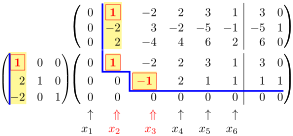

In [3]:
show_layout!(pb, fig_scale=1.2)

## nM.ge with pivots and paths

In [4]:
matrices, pivot_cols = reduce_to_ref([A B], gj=true)
pivot_locs = [(i-1, Int64(pivot_cols[i]-1)) for i in eachindex(pivot_cols)]
ref_path_list = [[length(matrices)-1, 1, pivot_locs, "vh", "red"]]


1-element Vector{Vector{Any}}:
 [3, 1, [(0, 1), (1, 2)], "vh", "red"]

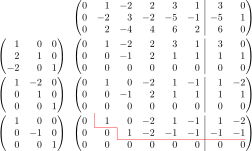

In [5]:
h, _ = nM.ge(to_latex(matrices), Nrhs=size(B,2), ref_path_list=ref_path_list, tmp_dir="../../tmp")
h

## Variable summary + array names

In [8]:
pivot_list, bg_for_entries, ref_path_list, basic_var = decorate_ge(pb.desc, pb.pivot_cols, size(pb.A); pivot_color="yellow!40")
;

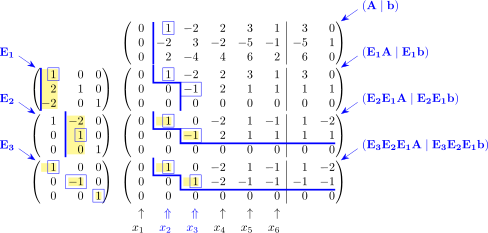

In [7]:
h, _ = nM.ge(to_latex(pb.matrices), formater=x->x, Nrhs=pb.num_rhs,
    pivot_list=pivot_list, bg_for_entries=bg_for_entries, ref_path_list=ref_path_list,
    variable_summary=basic_var, array_names=["E", ["A", "b"]], fig_scale=1.2, tmp_dir="../../tmp")
h